In [571]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn.model_selection import train_test_split  # For split train and test data

In [572]:
# Function for generating sample data
def generate_data(n_samples=1000, test_size=0.2):
    """
    Generates synthetic data.

    Parameters
    ----------
    n_samples : int
        The number of data points to generate.

    Returns
    -------
    X (array-like) : Generated input feature values.
    Y (array-like) : Corresponding target values.
    """
    np.random.seed(40)
    x = np.random.rand(n_samples, 1) * 4   # Feature (Independent variable)
    y = 5 + 2.5 * x + np.random.randn(n_samples, 1) * 2   # Simulating real-world data with noise (Y = 2.5X + 5, Gaussian noise std dev = 2)
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=43)
    return x, y, x_train, x_test, y_train, y_test

In [573]:
# Compute Mean Squared Error (MSE)
def compute_loss(y_true, y_pred):
    """
    Calculates the Mean Squared Error (MSE) between the true and predicted values.

    Parameters
    ----------
    y_true (array-like) : Actual target values.
    y_pred (array-like) : Predicted values from the model.

    Returns
    -------
    float: The mean squared error value.
    """
    return np.mean((y_true - y_pred) ** 2)

In [574]:
# Compute gradients for m and c
def compute_gradients(x, y, slope:int, intercept:int):
    """
    Calculates gradients for slope(m) and intercept(c).

    Parameters
    ----------
    x (array_like) : train data (Feature).
    y (array_like) : train data (Target).
    slope (int) : Slope(m).
    intercept (int) : Intercept(c).

    Returns
    -------
    derslope (float) : Derivative of slope
    derinter (float) : Derivative of intercept
    mean squared error (float) : mean squared error of y_pred
    """
    n = len(x)
    y_pred = slope * x + intercept
    error = y - y_pred

    derslope = (-2/n) * np.sum(x * error)
    derinter = (-2/n) * np.sum(error)

    return derslope, derinter, compute_loss(y, y_pred) 

In [575]:
# Prediction function
def predict(x, m, c):
    """
    Function to predict test data

    Parameters
    ----------
    x (array_like) : X test data 
    m (int) : slope of best fit line
    c (int) : intercept of the best fit line

    Returns
    -------
    y_pred (array_like) : y predicted
    """
    return x * m + c

In [576]:
# Plot training loss over epochs
def plot_loss(loss_history):
    plt.figure(figsize=(8, 5))
    plt.plot(range(len(loss_history)), loss_history, color='blue', label="Loss")
    plt.xlabel("Epochs")
    plt.ylabel("MSE Loss")
    plt.title("Training Loss Over Epochs")
    plt.legend()
    plt.grid()
    plt.show()

In [577]:
# Plot final regression line
def plot_regression_line(X, y, m, c):
    plt.figure(figsize=(8, 5))
    plt.scatter(X, y, color="blue", label="Actual Data")
    plt.plot(X, m * X + c, color="red", label="Predicted Line")
    plt.xlabel("X")
    plt.ylabel("y")
    plt.title("Simple Linear Regression")
    plt.legend()
    plt.grid()
    plt.show()

In [578]:
# Gradient Descent Algorithm
def fit(x, y, alpha:int=0.01, epochs:int=10000):
    """
    Gradient Descent Algorithm
    
    Parameters
    ----------
    x (array_like) : Train data (Feature(x))
    y (array_like) : Train data (Target(y))
    alpha (int) : Learning rate 
    epochs (int) : Epochs 

    Returns
    -------
    slope (int) : Slope of the best fit line
    intercept : Intercept of the best fit line
    loss_history : Loss history
    """
    m, c = np.random.randn(), np.random.randn()
    loss_history = []

    print("\nTraining Progress")
    custom_bar = "{desc}: {percentage:3.0f}% 🚀 |{bar}| 🎯{n_fmt}/{total_fmt} ⏳[{elapsed}<{remaining}, ⚡{rate_fmt}]"
    for epoch in tqdm(range(epochs), ncols=100, bar_format=custom_bar, ascii="▓▒░"):
        dm, dc, loss = compute_gradients(x, y, m, c)
        m -= alpha * dm
        c -= alpha * dc
        loss_history.append(loss)

    print(f"Epoch {epoch}, Loss: {loss:.4f}")
    return m, c, loss_history        


Training Progress


100% 🚀 |░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░| 🎯10000/10000 ⏳[00:00<00:00, ⚡30012.72it/s]


Epoch 9999, Loss: 4.0192

Final parameters: m = 2.5124, c = 5.1240


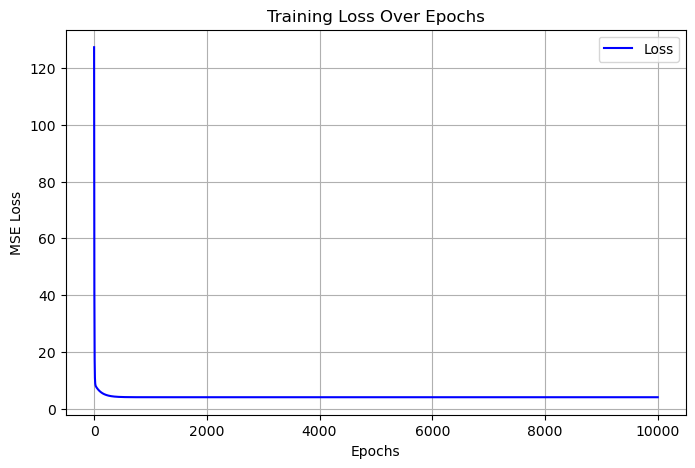

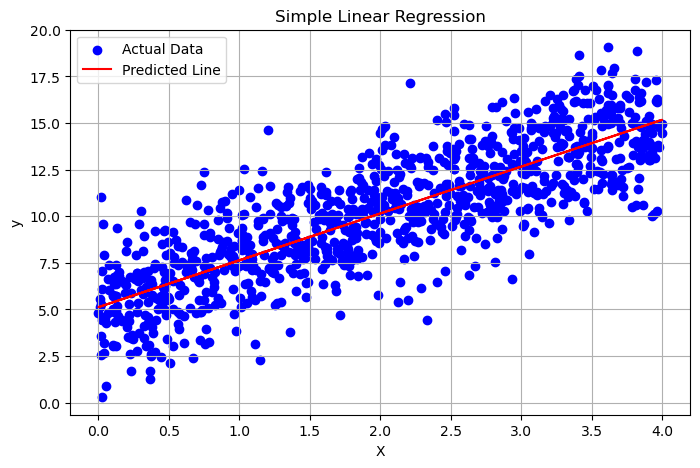

3.8468529581295114


In [579]:
if __name__ == "__main__":
    X, Y, x_train, x_test, y_train, y_test = generate_data()
    m, c, loss_history = fit(x_train, y_train, epochs=10000, alpha=0.01)

    print(f"\nFinal parameters: m = {m:.4f}, c = {c:.4f}")

    plot_loss(loss_history)
    plot_regression_line(X, Y, m, c)

    y_pred = predict(x_test, m, c)
    print(compute_loss(y_test, y_pred))